In [2]:
import mysql.connector
import pandas as pd

mydb = mysql.connector.connect(
      host="127.0.0.1",
      user="root",
      password="Giri@14102003",
      database="db_churn"
    )

In [3]:
!pip install seaborn

In [4]:
query = "SELECT * FROM customer_data"

In [5]:
df = pd.read_sql(query, mydb)

C:\Users\sanka\AppData\Local\Temp\ipykernel_22036\2281415734.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


In [6]:
mydb.close()

In [7]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,,
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,,
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   6418 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               6418 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                6418 non-null   object 
 12  Online_Security              6418 non-null   object 
 13  Online_Backup     

In [8]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [9]:
missing_values = df.isnull().sum()
print("Missing values per column : \n",missing_values)

Missing values per column : 
 Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Stat

In [13]:
#Examine the unique distribution of categorical columns
categorical_cols = df[["Gender", "Married", "Value_Deal", "Phone_Service", "Multiple_Lines", "Internet_Service", "Internet_Type", "Online_Security", "Online_Backup", "Device_Protection_Plan", "Premium_Support", "Streaming_TV", "Streaming_Movies", "Streaming_Music", "Unlimited_Data", "Contract", "Paperless_Billing", "Payment_Method", "Customer_Status", "Churn_Category", "Churn_Reason"]].columns

for col in categorical_cols:
    print(f"Values count for '{col}' : ")
    display(df[col].value_counts())

Values count for 'Gender' : 


Gender
Female    4048
Male      2370
Name: count, dtype: int64

Values count for 'Married' : 


Married
No     3223
Yes    3195
Name: count, dtype: int64

Values count for 'Value_Deal' : 


Value_Deal
          3548
Deal 2     758
Deal 5     738
Deal 4     540
Deal 1     469
Deal 3     365
Name: count, dtype: int64

Values count for 'Phone_Service' : 


Phone_Service
Yes    5796
No      622
Name: count, dtype: int64

Values count for 'Multiple_Lines' : 


Multiple_Lines
No     3082
Yes    2714
        622
Name: count, dtype: int64

Values count for 'Internet_Service' : 


Internet_Service
Yes    5028
No     1390
Name: count, dtype: int64

Values count for 'Internet_Type' : 


Internet_Type
Fiber Optic    2764
DSL            1502
               1390
Cable           762
Name: count, dtype: int64

Values count for 'Online_Security' : 


Online_Security
No     3204
Yes    1824
       1390
Name: count, dtype: int64

Values count for 'Online_Backup' : 


Online_Backup
No     2820
Yes    2208
       1390
Name: count, dtype: int64

Values count for 'Device_Protection_Plan' : 


Device_Protection_Plan
No     2817
Yes    2211
       1390
Name: count, dtype: int64

Values count for 'Premium_Support' : 


Premium_Support
No     3172
Yes    1856
       1390
Name: count, dtype: int64

Values count for 'Streaming_TV' : 


Streaming_TV
No     2556
Yes    2472
       1390
Name: count, dtype: int64

Values count for 'Streaming_Movies' : 


Streaming_Movies
No     2520
Yes    2508
       1390
Name: count, dtype: int64

Values count for 'Streaming_Music' : 


Streaming_Music
No     2766
Yes    2262
       1390
Name: count, dtype: int64

Values count for 'Unlimited_Data' : 


Unlimited_Data
Yes    4334
       1390
No      694
Name: count, dtype: int64

Values count for 'Contract' : 


Contract
Month-to-Month    3286
Two Year          1719
One Year          1413
Name: count, dtype: int64

Values count for 'Paperless_Billing' : 


Paperless_Billing
Yes    3792
No     2626
Name: count, dtype: int64

Values count for 'Payment_Method' : 


Payment_Method
Bank Withdrawal    3575
Credit Card        2494
Mailed Check        349
Name: count, dtype: int64

Values count for 'Customer_Status' : 


Customer_Status
Stayed     4275
Churned    1732
Joined      411
Name: count, dtype: int64

Values count for 'Churn_Category' : 


Churn_Category
                   4686
Competitor          761
Attitude            301
Dissatisfaction     300
Price               196
Other               174
Name: count, dtype: int64

Values count for 'Churn_Reason' : 


Churn_Reason
                                             4686
Competitor had better devices                 289
Competitor made better offer                  274
Attitude of support person                    208
Don't know                                    124
Competitor offered more data                  106
Attitude of service provider                   93
Competitor offered higher download speeds      92
Price too high                                 72
Product dissatisfaction                        71
Network reliability                            66
Long distance charges                          62
Service dissatisfaction                        61
Moved                                          45
Extra data charges                             34
Limited range of services                      33
Poor expertise of online support               30
Lack of affordable download/upload speed       28
Lack of self-service on Website                27
Poor expertise of phone support      

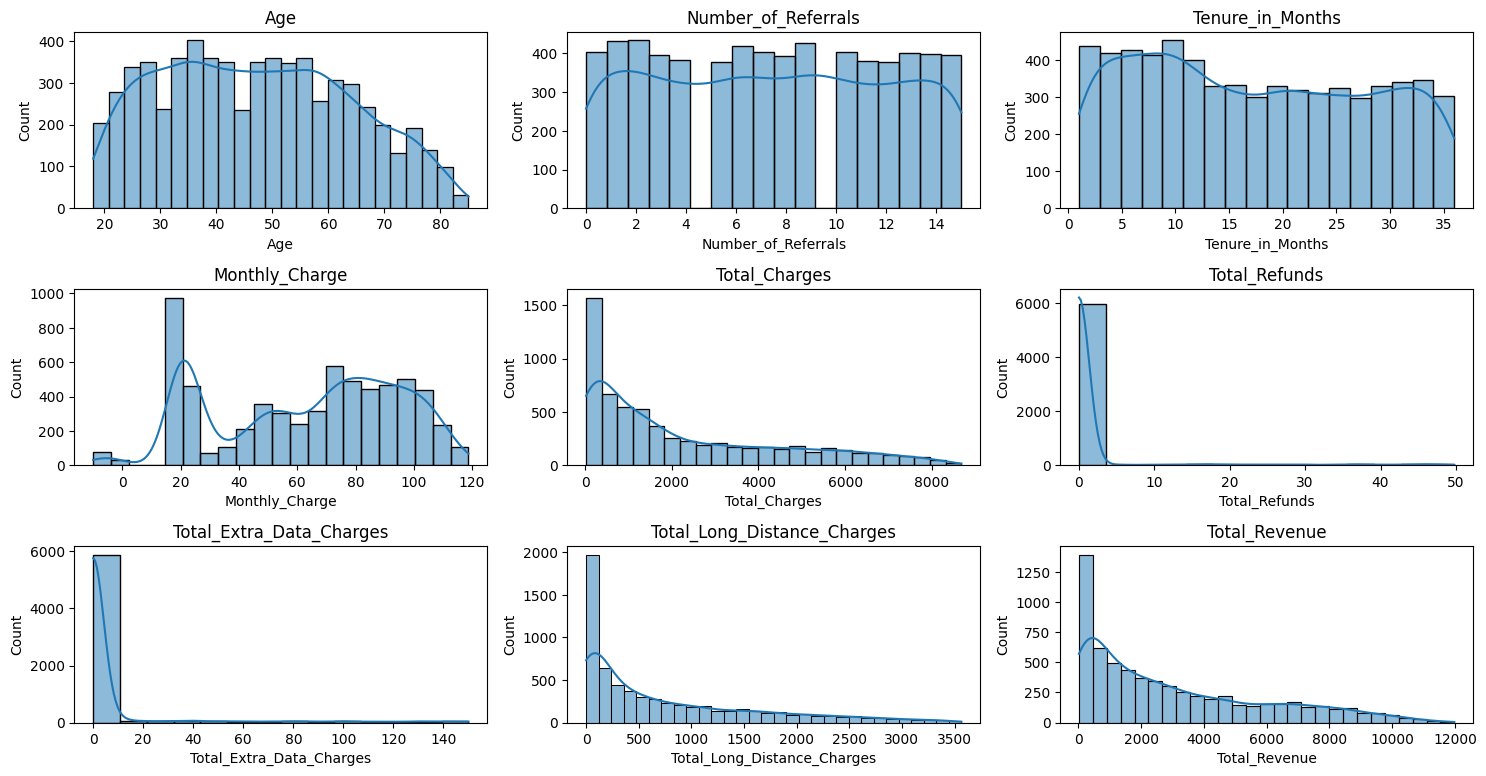

In [17]:
#Univarirate Analysis
# 1. Histograms (Distribution)
import matplotlib.pyplot as plt
import seaborn as sns

#Numerical analysis and exploration
numerical_cols = ['Age', 'Number_of_Referrals', 'Tenure_in_Months', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue']
plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


Displaying Box Plots...


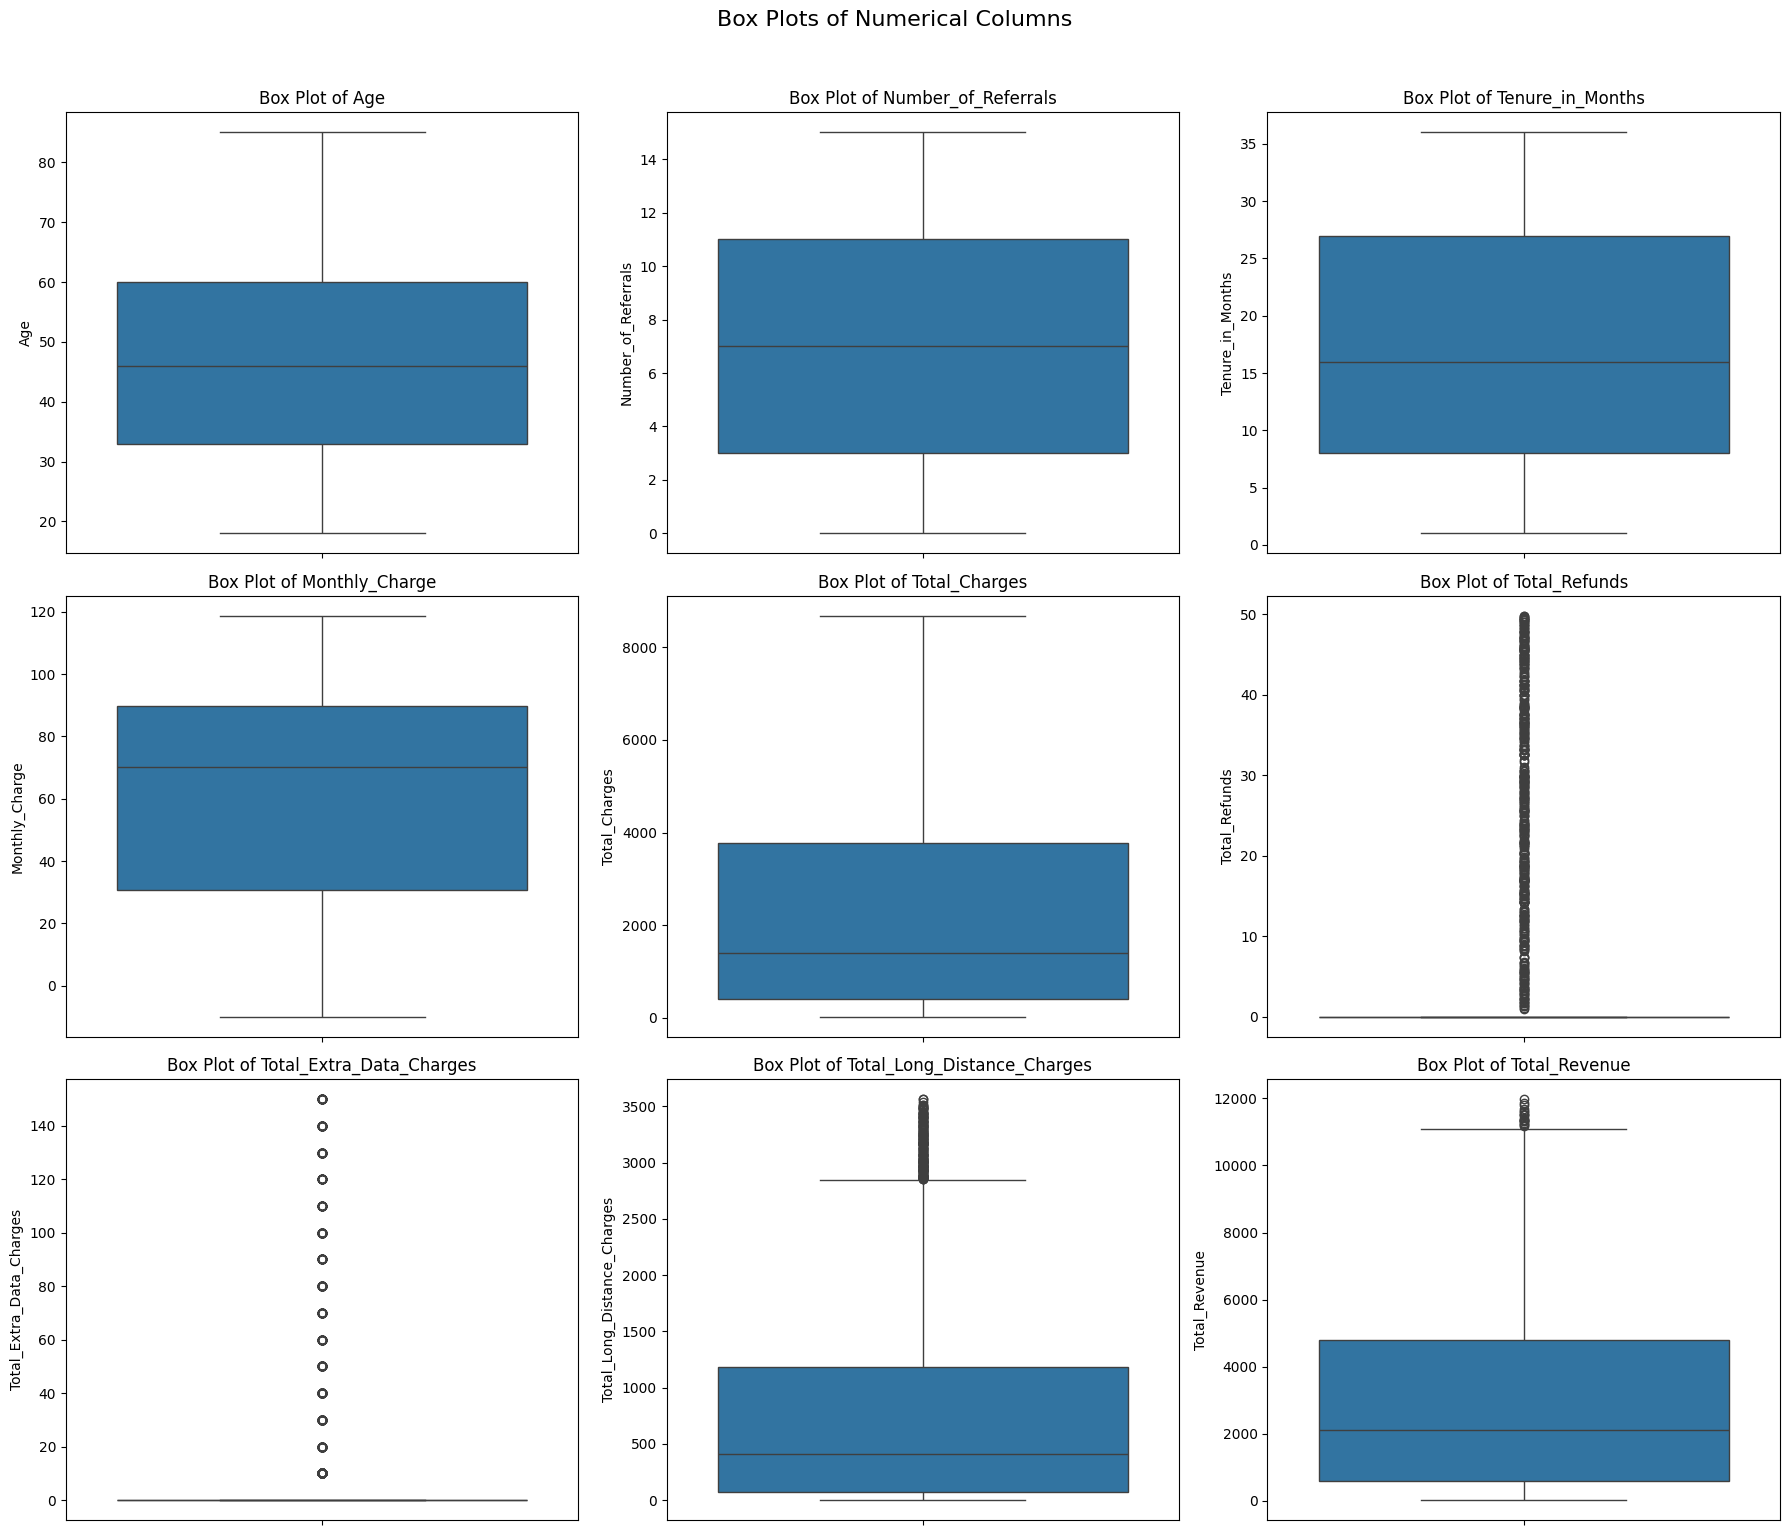

In [18]:
# 2. Box Plots (Outliers, Spread, Quartiles)
print("\nDisplaying Box Plots...")
plt.figure(figsize=(18, 15))
plt.suptitle("Box Plots of Numerical Columns", fontsize=16, y=1.02)
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col]) # Plotting vertically
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('') # Remove x-label for vertical boxplot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


Displaying Density Plots (KDE)...


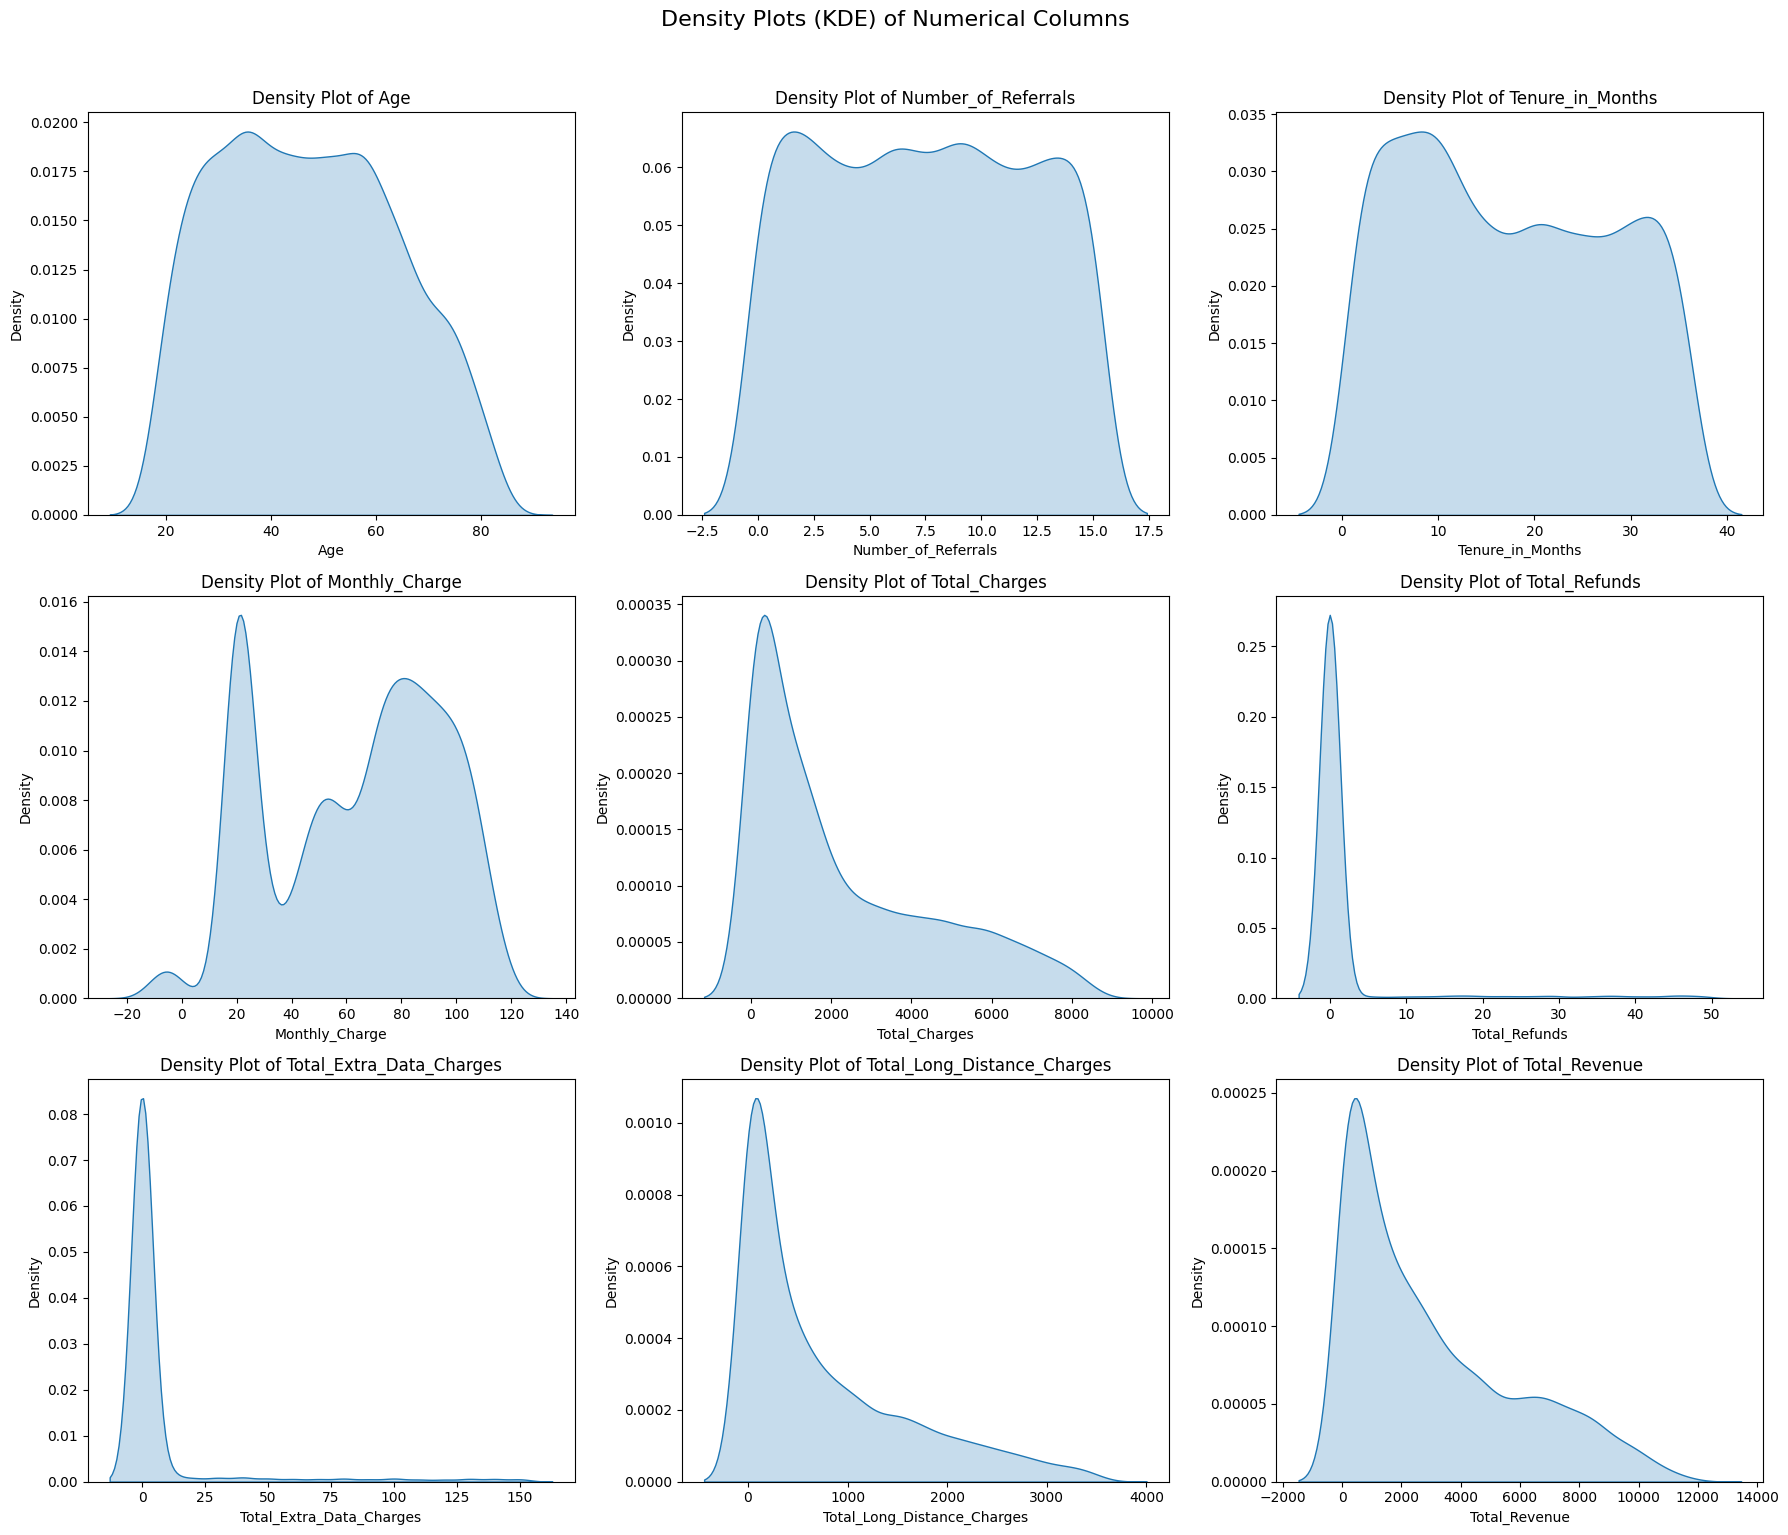

In [19]:
# 3. Density Plots (Smoothed Distribution)
print("\nDisplaying Density Plots (KDE)...")
plt.figure(figsize=(18, 15))
plt.suptitle("Density Plots (KDE) of Numerical Columns", fontsize=16, y=1.02)
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(df[col], fill=True) # Kernel Density Estimate plot with fill
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

In [21]:
# --- Statistical Univariate Analysis ---

print("\n--- Calculating Descriptive Statistics ---")

# Create a dictionary to store the results
stats_summary = {}

for col in numerical_cols:
    # Check if column exists and is numeric before calculating
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        # Calculate mode - mode() returns a Series, handle potential multiple modes
        mode_val = df[col].mode()
        mode_str = ', '.join(map(str, mode_val.tolist())) if not mode_val.empty else 'N/A'

        stats_summary[col] = {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Mode': mode_str, # Store mode as string
            'Std Dev': df[col].std(),
            'Variance': df[col].var(),
            'Min': df[col].min(),
            '25th Percentile (Q1)': df[col].quantile(0.25),
            '50th Percentile (Median)': df[col].quantile(0.50),
            '75th Percentile (Q3)': df[col].quantile(0.75),
            'Max': df[col].max(),
            'IQR (Q3-Q1)': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt() # Fisher's definition (normal=0)
        }
    else:
        print(f"Warning: Column '{col}' not found or not numeric. Skipping statistics.")

# Convert the summary dictionary to a DataFrame for nice display
stats_df = pd.DataFrame(stats_summary)

# Print the statistics DataFrame (transposed for better readability)
print("\n--- Descriptive Statistics Summary ---")
print(stats_df.T) # Transpose .T to have columns as rows




--- Calculating Descriptive Statistics ---

--- Descriptive Statistics Summary ---
                                    Mean    Median                 Mode  \
Age                            47.070739      46.0                   36   
Number_of_Referrals             7.427859       7.0                    2   
Tenure_in_Months               17.342786      16.0                    9   
Monthly_Charge                 63.652867      70.1                20.05   
Total_Charges                2280.374858  1396.125                 20.2   
Total_Refunds                   1.924944       0.0                  0.0   
Total_Extra_Data_Charges        6.718604       0.0                    0   
Total_Long_Distance_Charges   748.703468   407.475                  0.0   
Total_Revenue                3033.871987  2108.635  24.8, 66.56, 116.27   

                                 Std Dev        Variance    Min  \
Age                            16.703633      279.011358     18   
Number_of_Referrals            

In [22]:
# Optionally, print stats column by column if preferred
print("\n--- Detailed Statistics by Column ---")
for col, stats in stats_summary.items():
    print(f"\nStatistics for '{col}':")
    for stat_name, stat_value in stats.items():
        # Format floats nicely, handle mode string
         if isinstance(stat_value, (int, float)):
             print(f"  {stat_name}: {stat_value:.4f}")
         else:
             print(f"  {stat_name}: {stat_value}") 


--- Detailed Statistics by Column ---

Statistics for 'Age':
  Mean: 47.0707
  Median: 46.0000
  Mode: 36
  Std Dev: 16.7036
  Variance: 279.0114
  Min: 18
  25th Percentile (Q1): 33.0000
  50th Percentile (Median): 46.0000
  75th Percentile (Q3): 60.0000
  Max: 85
  IQR (Q3-Q1): 27.0000
  Skewness: 0.1824
  Kurtosis: -0.9558

Statistics for 'Number_of_Referrals':
  Mean: 7.4279
  Median: 7.0000
  Mode: 2
  Std Dev: 4.6215
  Variance: 21.3584
  Min: 0
  25th Percentile (Q1): 3.0000
  50th Percentile (Median): 7.0000
  75th Percentile (Q3): 11.0000
  Max: 15
  IQR (Q3-Q1): 8.0000
  Skewness: 0.0174
  Kurtosis: -1.2130

Statistics for 'Tenure_in_Months':
  Mean: 17.3428
  Median: 16.0000
  Mode: 9
  Std Dev: 10.5764
  Variance: 111.8600
  Min: 1
  25th Percentile (Q1): 8.0000
  50th Percentile (Median): 16.0000
  75th Percentile (Q3): 27.0000
  Max: 36
  IQR (Q3-Q1): 19.0000
  Skewness: 0.1524
  Kurtosis: -1.2402

Statistics for 'Monthly_Charge':
  Mean: 63.6529
  Median: 70.1000
  Mode


--- Numerical vs. Numerical ---


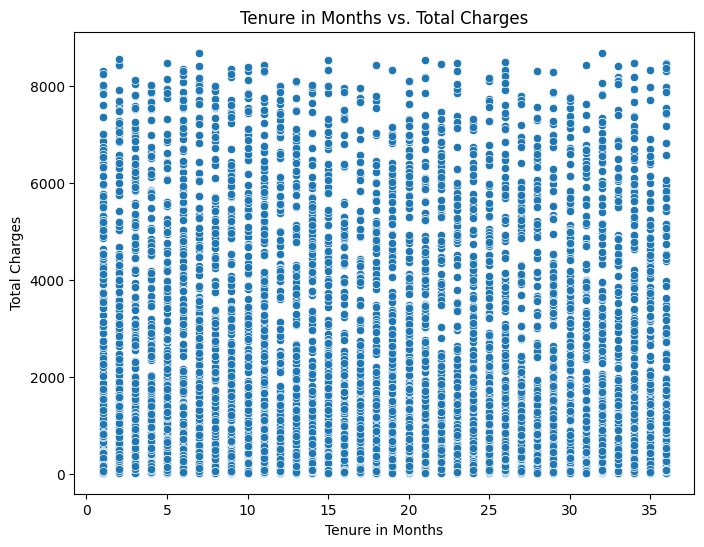

Pearson Correlation (Tenure vs. Total Charges): -0.000 (p-value: 0.972)
Spearman Correlation (Tenure vs. Total Charges): 0.006 (p-value: 0.630)


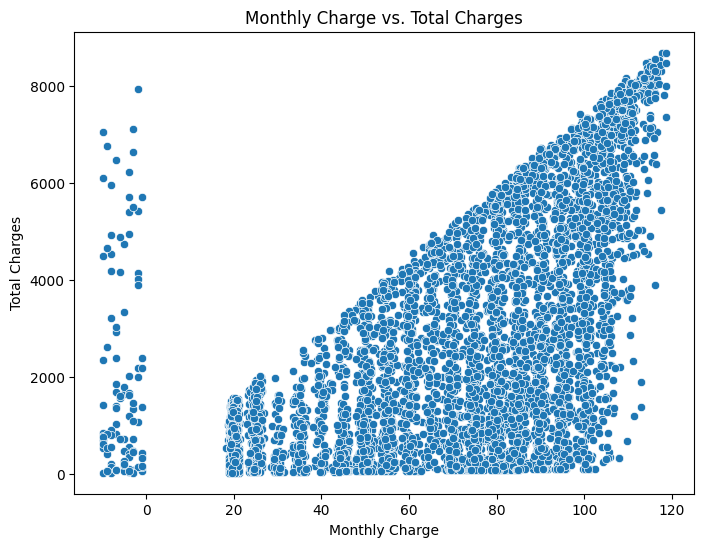

Pearson Correlation (Monthly Charge vs. Total Charges): 0.623 (p-value: 0.000)
Spearman Correlation (Monthly Charge vs. Total Charges): 0.621 (p-value: 0.000)


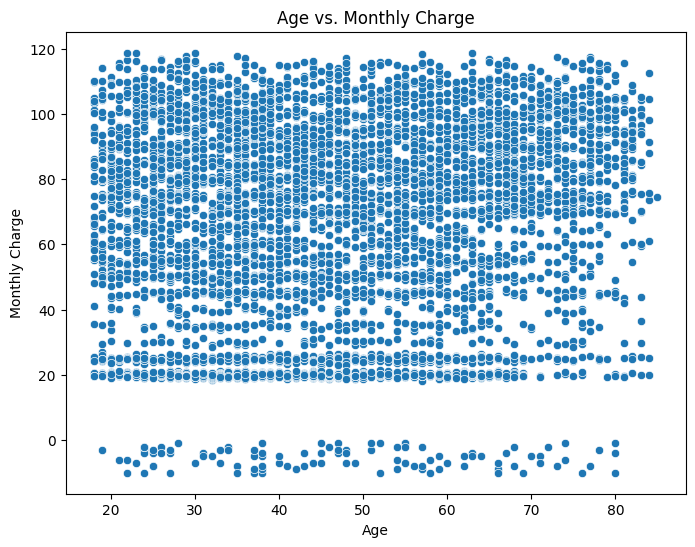

Pearson Correlation (Age vs. Monthly Charge): 0.134 (p-value: 0.000)
Spearman Correlation (Age vs. Monthly Charge): 0.128 (p-value: 0.000)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway, chi2_contingency
import numpy as np



# --- Numerical vs. Numerical ---

print("\n--- Numerical vs. Numerical ---")

# 1. Tenure in Months vs. Total Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure_in_Months', y='Total_Charges', data=df)
plt.title('Tenure in Months vs. Total Charges')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges')
plt.show()

correlation_pearson, p_value_pearson = pearsonr(df['Tenure_in_Months'], df['Total_Charges'])
print(f"Pearson Correlation (Tenure vs. Total Charges): {correlation_pearson:.3f} (p-value: {p_value_pearson:.3f})")

correlation_spearman, p_value_spearman = spearmanr(df['Tenure_in_Months'], df['Total_Charges'])
print(f"Spearman Correlation (Tenure vs. Total Charges): {correlation_spearman:.3f} (p-value: {p_value_spearman:.3f})")

# 2. Monthly Charge vs. Total Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Monthly_Charge', y='Total_Charges', data=df)
plt.title('Monthly Charge vs. Total Charges')
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charges')
plt.show()

correlation_pearson, p_value_pearson = pearsonr(df['Monthly_Charge'], df['Total_Charges'])
print(f"Pearson Correlation (Monthly Charge vs. Total Charges): {correlation_pearson:.3f} (p-value: {p_value_pearson:.3f})")

correlation_spearman, p_value_spearman = spearmanr(df['Monthly_Charge'], df['Total_Charges'])
print(f"Spearman Correlation (Monthly Charge vs. Total Charges): {correlation_spearman:.3f} (p-value: {p_value_spearman:.3f})")

# 3. Age vs. Monthly Charge (Assuming 'Age' column exists)
if 'Age' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age', y='Monthly_Charge', data=df)
    plt.title('Age vs. Monthly Charge')
    plt.xlabel('Age')
    plt.ylabel('Monthly Charge')
    plt.show()

    correlation_pearson, p_value_pearson = pearsonr(df['Age'], df['Monthly_Charge'])
    print(f"Pearson Correlation (Age vs. Monthly Charge): {correlation_pearson:.3f} (p-value: {p_value_pearson:.3f})")

    correlation_spearman, p_value_spearman = spearmanr(df['Age'], df['Monthly_Charge'])
    print(f"Spearman Correlation (Age vs. Monthly Charge): {correlation_spearman:.3f} (p-value: {p_value_spearman:.3f})")
else:
    print("Note: 'Age' column not found in the dataset.")


--- Numerical vs. Categorical ---


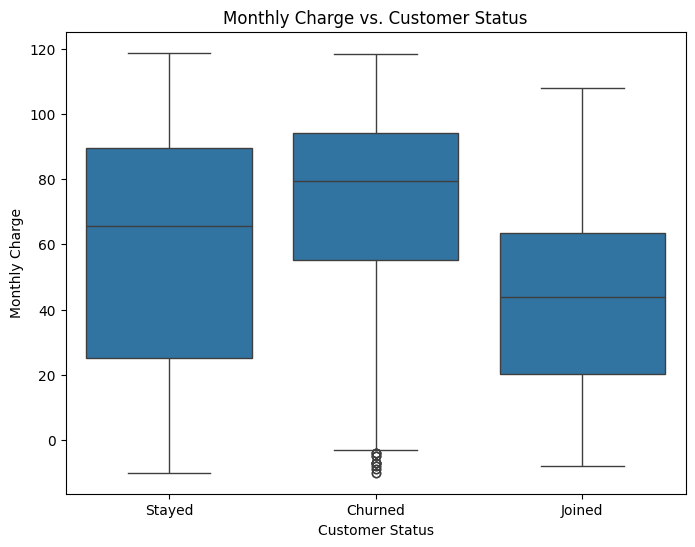

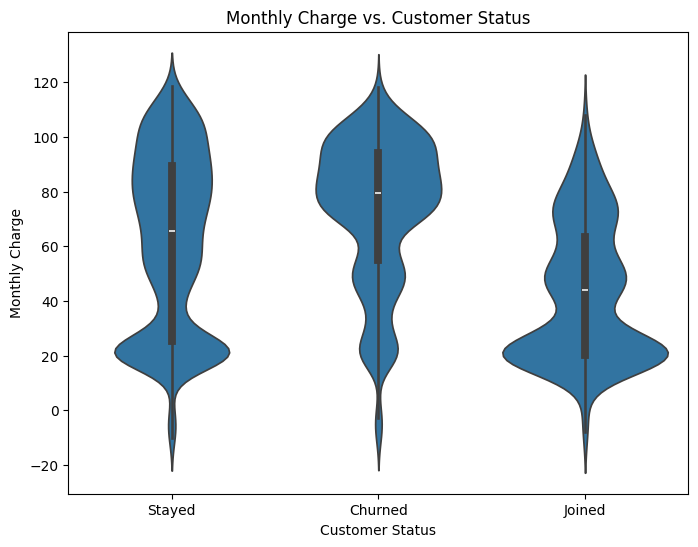

Note: Performing ANOVA as 'Customer Status' has more than 2 categories.
ANOVA (Monthly Charge vs. Customer Status): F = 190.195, p = 0.000


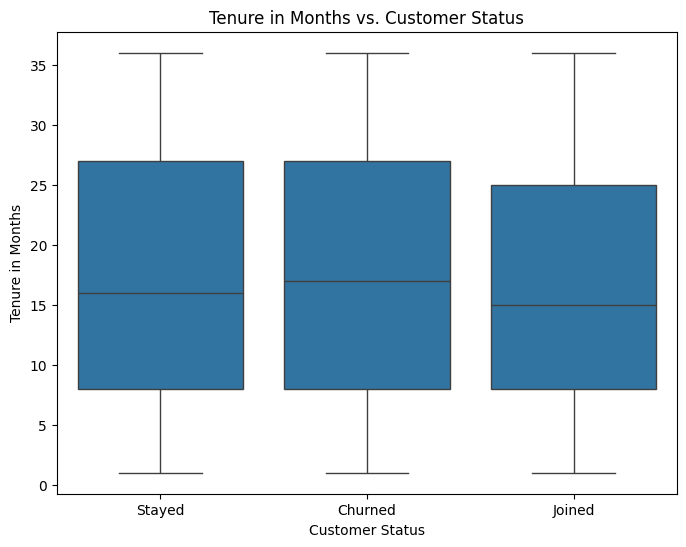

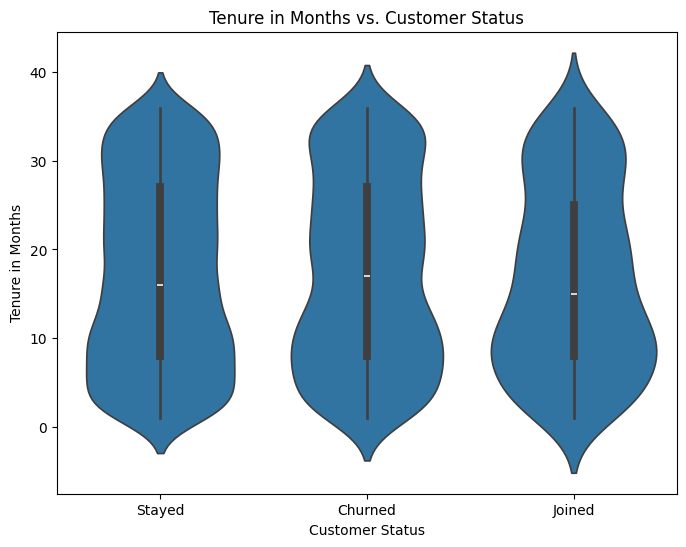

ANOVA (Tenure vs. Customer Status): F = 1.283, p = 0.277


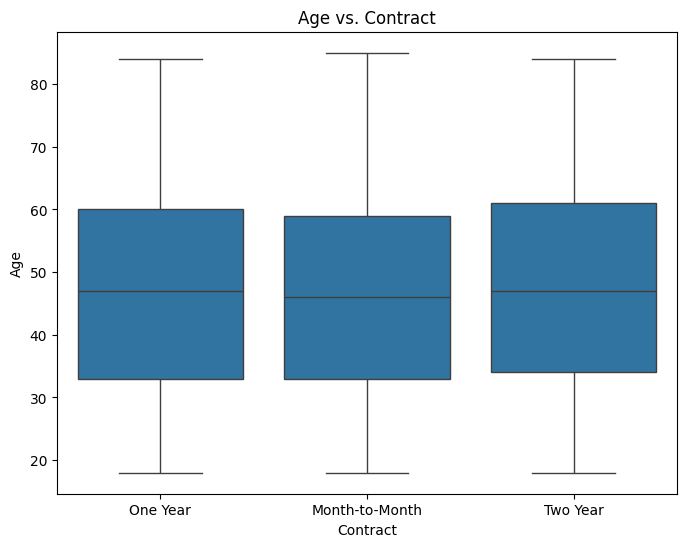

ANOVA (Age vs. Contract): F = 2.724, p = 0.066


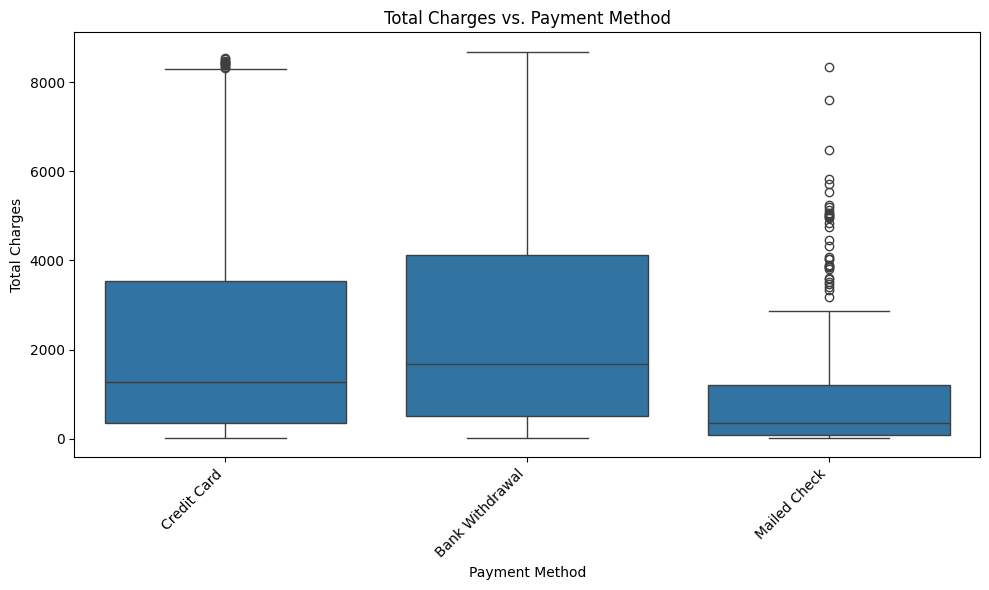

ANOVA (Total Charges vs. Payment Method): F = 77.187, p = 0.000


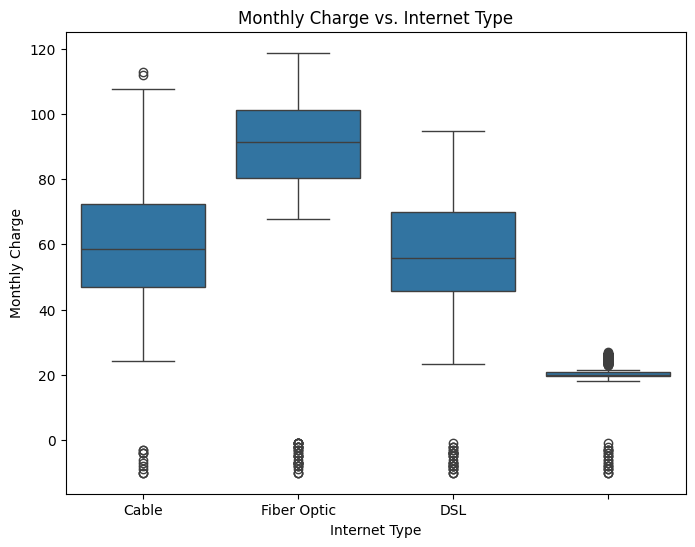

ANOVA (Monthly Charge vs. Internet Type): F = 6075.234, p = 0.000


In [13]:
# --- Numerical vs. Categorical ---

print("\n--- Numerical vs. Categorical ---")

# Assuming 'Customer Status' is a column indicating churn (e.g., 'Yes', 'No')

# 1. Monthly Charge vs. Customer Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Status', y='Monthly_Charge', data=df)
plt.title('Monthly Charge vs. Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')
plt.show()

# Alternatively, using violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Customer_Status', y='Monthly_Charge', data=df)
plt.title('Monthly Charge vs. Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')
plt.show()

# Perform t-test (assuming two categories in 'Customer Status')
if df['Customer_Status'].nunique() == 2:
    churned_monthly = df[df['Customer_Status'] == df['Customer_Status'].unique()[0]]['Monthly_Charge']
    not_churned_monthly = df[df['Customer_Status'] == df['Customer Status'].unique()[1]]['Monthly_Charge']
    t_statistic, p_value_ttest = ttest_ind(churned_monthly, not_churned_monthly)
    print(f"T-test (Monthly Charge vs. Customer Status): t = {t_statistic:.3f}, p = {p_value_ttest:.3f}")
else:
    print("Note: Performing ANOVA as 'Customer Status' has more than 2 categories.")
    # Perform ANOVA if more than 2 categories
    groups = df.groupby('Customer_Status')['Monthly_Charge'].apply(list)
    f_statistic, p_value_anova = f_oneway(*groups)
    print(f"ANOVA (Monthly Charge vs. Customer Status): F = {f_statistic:.3f}, p = {p_value_anova:.3f}")

# 2. Tenure in Months vs. Customer Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Status', y='Tenure_in_Months', data=df)
plt.title('Tenure in Months vs. Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Tenure in Months')
plt.show()

# Alternatively, using violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Customer_Status', y='Tenure_in_Months', data=df)
plt.title('Tenure in Months vs. Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Tenure in Months')
plt.show()

# Perform t-test or ANOVA
if df['Customer_Status'].nunique() == 2:
    churned_tenure = df[df['Customer_Status'] == df['Customer_Status'].unique()[0]]['Tenure_in_Months']
    not_churned_tenure = df[df['Customer_Status'] == df['Customer_Status'].unique()[1]]['Tenure_in_Months']
    t_statistic, p_value_ttest = ttest_ind(churned_tenure, not_churned_tenure)
    print(f"T-test (Tenure vs. Customer Status): t = {t_statistic:.3f}, p = {p_value_ttest:.3f}")
else:
    groups = df.groupby('Customer_Status')['Tenure_in_Months'].apply(list)
    f_statistic, p_value_anova = f_oneway(*groups)
    print(f"ANOVA (Tenure vs. Customer Status): F = {f_statistic:.3f}, p = {p_value_anova:.3f}")

# 3. Age vs. Contract (Assuming 'Age' and 'Contract' columns exist)
if 'Age' in df.columns and 'Contract' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Contract', y='Age', data=df)
    plt.title('Age vs. Contract')
    plt.xlabel('Contract')
    plt.ylabel('Age')
    plt.show()

    # Perform ANOVA as 'Contract' likely has more than 2 categories
    groups_age_contract = df.groupby('Contract')['Age'].apply(list)
    f_statistic_age_contract, p_value_age_contract = f_oneway(*groups_age_contract)
    print(f"ANOVA (Age vs. Contract): F = {f_statistic_age_contract:.3f}, p = {p_value_age_contract:.3f}")
else:
    print("Note: Either 'Age' or 'Contract' column not found.")

# 4. Total Charges vs. Payment Method (Assuming 'Payment Method' column exists)
if 'Payment_Method' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Payment_Method', y='Total_Charges', data=df)
    plt.title('Total Charges vs. Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel('Total Charges')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Perform ANOVA
    groups_total_payment = df.groupby('Payment_Method')['Total_Charges'].apply(list)
    # Remove any empty lists that might occur due to missing values
    groups_total_payment = [group for group in groups_total_payment if len(group) > 0 and not all(pd.isna(g) for g in group)]
    if len(groups_total_payment) > 1:
        f_statistic_total_payment, p_value_total_payment = f_oneway(*groups_total_payment)
        print(f"ANOVA (Total Charges vs. Payment Method): F = {f_statistic_total_payment:.3f}, p = {p_value_total_payment:.3f}")
    else:
        print("Note: Not enough valid categories in 'Payment Method' for ANOVA.")
else:
    print("Note: 'Payment Method' column not found.")

# 5. Monthly Charge vs. Internet Type (Assuming 'Internet Type' column exists)
if 'Internet_Type' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Internet_Type', y='Monthly_Charge', data=df)
    plt.title('Monthly Charge vs. Internet Type')
    plt.xlabel('Internet Type')
    plt.ylabel('Monthly Charge')
    plt.show()

    # Perform ANOVA
    groups_monthly_internet = df.groupby('Internet_Type')['Monthly_Charge'].apply(list)
    f_statistic_monthly_internet, p_value_monthly_internet = f_oneway(*groups_monthly_internet)
    print(f"ANOVA (Monthly Charge vs. Internet Type): F = {f_statistic_monthly_internet:.3f}, p = {p_value_monthly_internet:.3f}")
else:
    print("Note: 'Internet Type' column not found.")


--- Categorical vs. Categorical ---

Contingency Table (Contract vs. Customer Status):
 Customer_Status  Churned  Joined  Stayed
Contract                                
Month-to-Month      1529     367    1390
One Year             156      24    1233
Two Year              47      20    1652


<Figure size 800x600 with 0 Axes>

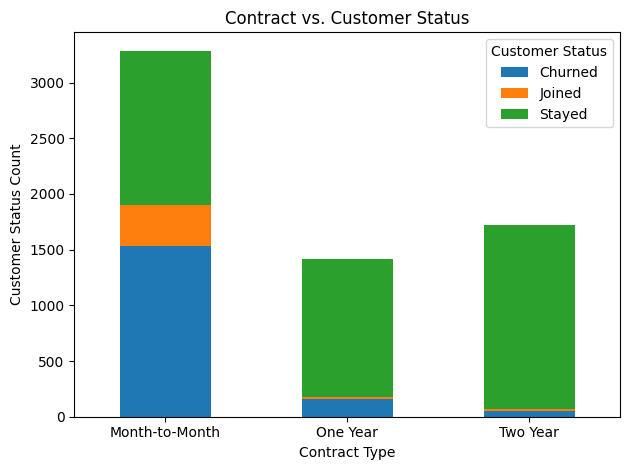

Chi-Squared Test (Contract vs. Customer Status): Chi2 = 1818.435, p = 0.000

Contingency Table (Internet Service vs. Customer Status):
 Customer_Status   Churned  Joined  Stayed
Internet_Service                         
No                    109     167    1114
Yes                  1623     244    3161


<Figure size 800x600 with 0 Axes>

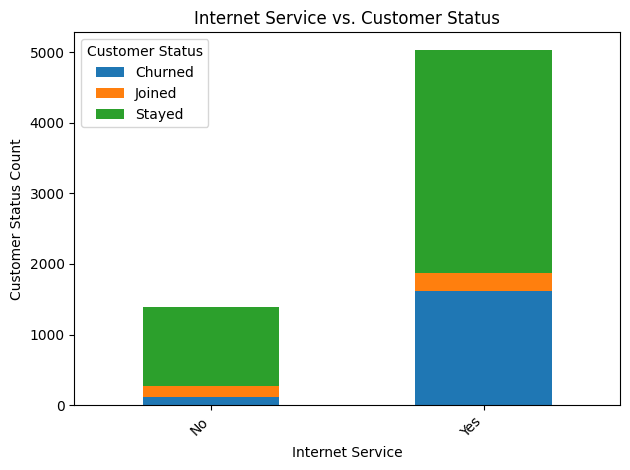

Chi-Squared Test (Internet Service vs. Customer Status): Chi2 = 376.984, p = 0.000

Contingency Table (Payment Method vs. Customer Status):
 Customer_Status  Churned  Joined  Stayed
Payment_Method                          
Bank Withdrawal     1231     160    2184
Credit Card          369     210    1915
Mailed Check         132      41     176


<Figure size 1000x600 with 0 Axes>

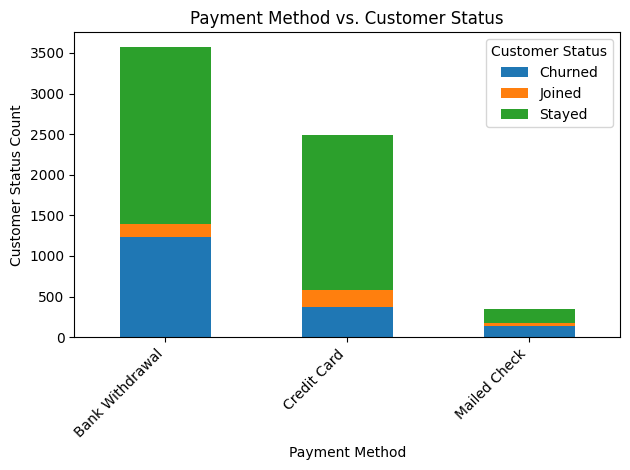

Chi-Squared Test (Payment Method vs. Customer Status): Chi2 = 346.982, p = 0.000

Contingency Table (Online Security vs. Customer Status):
 Customer_Status  Churned  Joined  Stayed
Online_Security                         
                     109     167    1114
No                  1357     201    1646
Yes                  266      43    1515


<Figure size 800x600 with 0 Axes>

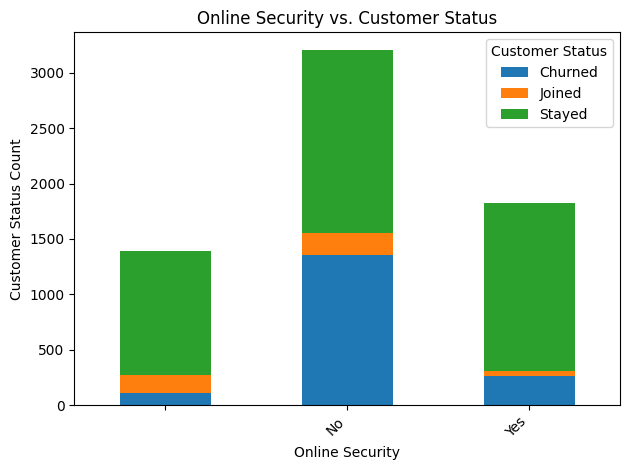

Chi-Squared Test (Online Security vs. Customer Status): Chi2 = 912.153, p = 0.000

Contingency Table (Churn Category vs. Contract for Churned Customers):
 Contract         Month-to-Month  One Year  Two Year
Churn_Category                                     
Attitude                    272        25         4
Competitor                  674        64        23
Dissatisfaction             264        27         9
Other                       151        22         1
Price                       168        18        10


<Figure size 1000x600 with 0 Axes>

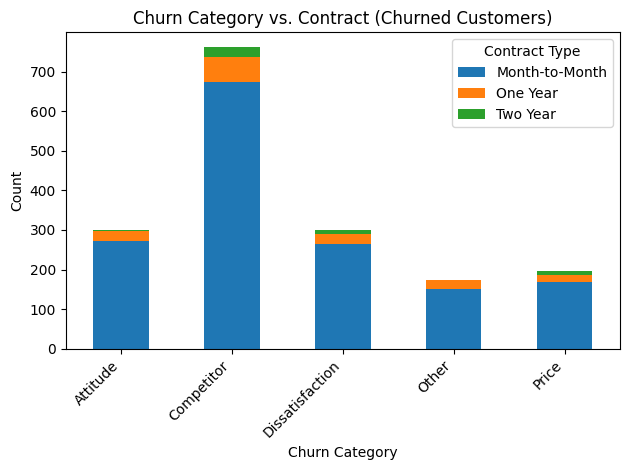

Chi-Squared Test (Churn Category vs. Contract for Churned Customers): Chi2 = 12.914, p = 0.115


In [12]:
# --- Categorical vs. Categorical ---

print("\n--- Categorical vs. Categorical ---")

# Assuming 'Customer Status', 'Contract', 'Internet Service', 'Payment Method', 'Online Security', 'Churn Category' columns exist

# 1. Contract vs. Customer Status
contingency_table = pd.crosstab(df['Contract'], df['Customer_Status'])
print("\nContingency Table (Contract vs. Customer Status):\n", contingency_table)

plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Contract vs. Customer Status')
plt.xlabel('Contract Type')
plt.ylabel('Customer Status Count')
plt.xticks(rotation=0)
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()

chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Squared Test (Contract vs. Customer Status): Chi2 = {chi2:.3f}, p = {p_value_chi2:.3f}")

# 2. Internet Service vs. Customer Status
if 'Internet_Service' in df.columns:
    contingency_table = pd.crosstab(df['Internet_Service'], df['Customer_Status'])
    print("\nContingency Table (Internet Service vs. Customer Status):\n", contingency_table)

    plt.figure(figsize=(8, 6))
    contingency_table.plot(kind='bar', stacked=True)
    plt.title('Internet Service vs. Customer Status')
    plt.xlabel('Internet Service')
    plt.ylabel('Customer Status Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Customer Status')
    plt.tight_layout()
    plt.show()

    chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Squared Test (Internet Service vs. Customer Status): Chi2 = {chi2:.3f}, p = {p_value_chi2:.3f}")
else:
    print("Note: 'Internet Service' column not found.")

# 3. Payment Method vs. Customer Status
if 'Payment_Method' in df.columns:
    contingency_table = pd.crosstab(df['Payment_Method'], df['Customer_Status'])
    print("\nContingency Table (Payment Method vs. Customer Status):\n", contingency_table)

    plt.figure(figsize=(10, 6))
    contingency_table.plot(kind='bar', stacked=True)
    plt.title('Payment Method vs. Customer Status')
    plt.xlabel('Payment Method')
    plt.ylabel('Customer Status Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Customer Status')
    plt.tight_layout()
    plt.show()

    chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Squared Test (Payment Method vs. Customer Status): Chi2 = {chi2:.3f}, p = {p_value_chi2:.3f}")
else:
    print("Note: 'Payment Method' column not found.")

# 4. Online Security vs. Customer Status
if 'Online_Security' in df.columns:
    contingency_table = pd.crosstab(df['Online_Security'], df['Customer_Status'])
    print("\nContingency Table (Online Security vs. Customer Status):\n", contingency_table)

    plt.figure(figsize=(8, 6))
    contingency_table.plot(kind='bar', stacked=True)
    plt.title('Online Security vs. Customer Status')
    plt.xlabel('Online Security')
    plt.ylabel('Customer Status Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Customer Status')
    plt.tight_layout()
    plt.show()

    chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Squared Test (Online Security vs. Customer Status): Chi2 = {chi2:.3f}, p = {p_value_chi2:.3f}")
else:
    print("Note: 'Online Security' column not found.")

# 5. Churn Category vs. Contract (For churned customers)
if 'Churn_Category' in df.columns and 'Contract' in df.columns:
    churned_df = df[df['Customer_Status'] == 'Churned'] # Assuming 'Churned' is a value in 'Customer Status'
    if not churned_df.empty:
        contingency_table_churn = pd.crosstab(churned_df['Churn_Category'], churned_df['Contract'])
        print("\nContingency Table (Churn Category vs. Contract for Churned Customers):\n", contingency_table_churn)

        plt.figure(figsize=(10, 6))
        contingency_table_churn.plot(kind='bar', stacked=True)
        plt.title('Churn Category vs. Contract (Churned Customers)')
        plt.xlabel('Churn Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Contract Type')
        plt.tight_layout()
        plt.show()

        chi2_churn, p_value_chi2_churn, _, _ = chi2_contingency(contingency_table_churn)
        print(f"Chi-Squared Test (Churn Category vs. Contract for Churned Customers): Chi2 = {chi2_churn:.3f}, p = {p_value_chi2_churn:.3f}")
    else:
        print("Note: No churned customers found in the dataset to analyze 'Churn Category' vs. 'Contract'.")
else:
    print("Note: Either 'Churn Category' or 'Contract' column not found.")